In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

sys.path.append(str(Path().resolve().parent))

from src.data_preprocessing import load_and_prepare_data , create_lagged_features
from src.model import train_xgboost_model
from src.evalution import evaluate_model , plot_forecast

In [16]:
# Load data
data = load_and_prepare_data('../data/train.csv')


In [17]:
# Aggregate sales by date
sales_by_date = data.groupby('Order Date')['Sales'].sum().reset_index()

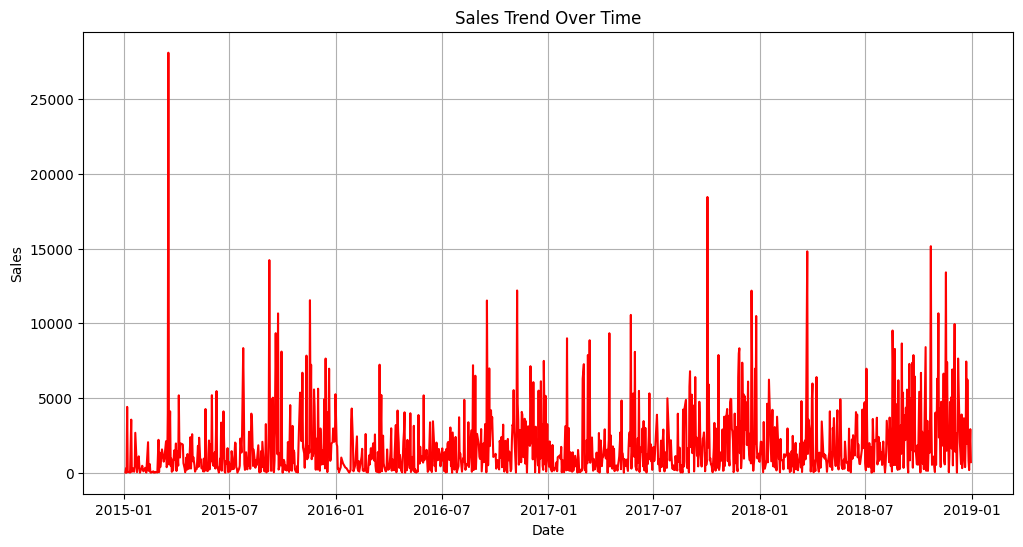

In [18]:
# Plot sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'], color='red')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [21]:
# Create lag features
lagged_data = create_lagged_features(
    sales_by_date[['Order Date', 'Sales']], lag=5
)

X = lagged_data.drop(columns=['Order Date', 'Sales'])
y = lagged_data['Sales']

In [22]:
# Train model
model, X_test, y_test = train_xgboost_model(X, y)

In [23]:
# Evaluate
predictions, rmse = evaluate_model(model, X_test, y_test)
print(f"RMSE: {rmse:.2f}")

RMSE: 2617.15


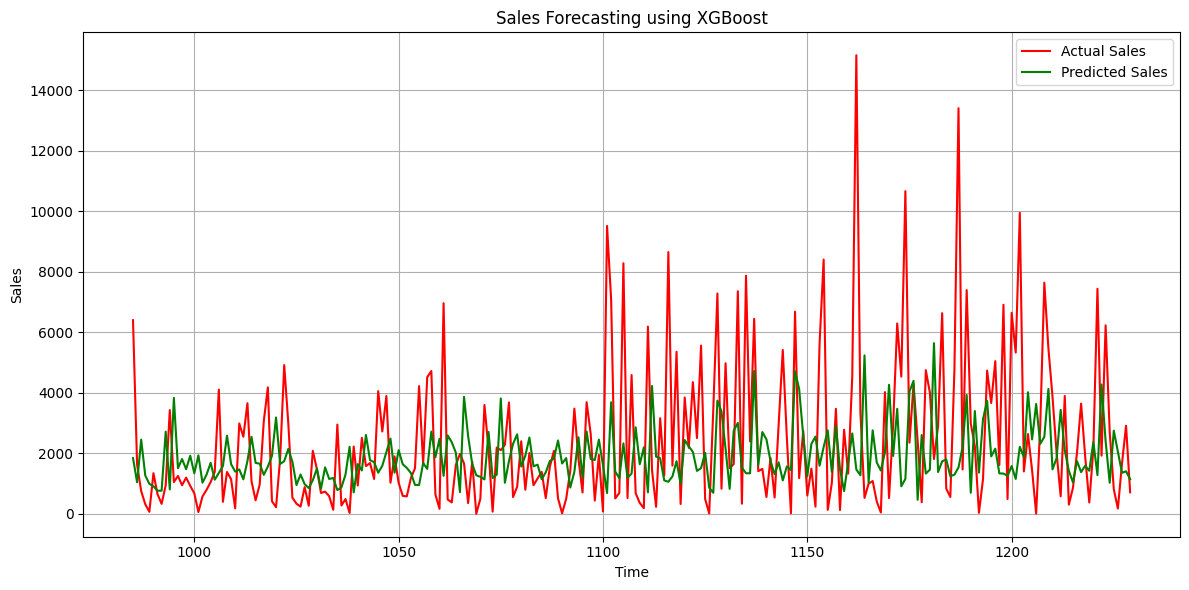

In [25]:
# Plot results
plot_forecast(y_test, predictions, save_path='../results/forecast_plot.png')